In [1]:
import cv2
import numpy as np
import Data_File
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


def avg_psnr(X,y):
    s = 0
    for i in range(len(X)):
        resized = cv2.resize(X[i],(0,0),fx=2,fy=2)
        s = s + psnr(resized,y[i])
    return s/len(X)
        

def mse(X,y):
    s = 0
    for i in range(len(X)):
        resized = cv2.resize(X[i],(0,0),fx=2,fy=2)
        s = s + np.mean((resized - y[i])**2)
    return s/len(X)
        

    
    

('Average PSNR for Bicubic Interpolation is ', 22.66710766039863)
('Average Train Error Bicubic Interpolation is ', 0.0061659390382411573)


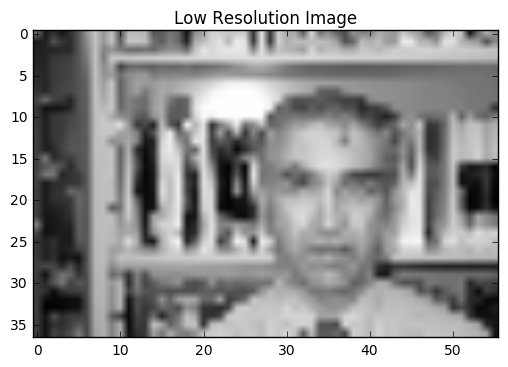

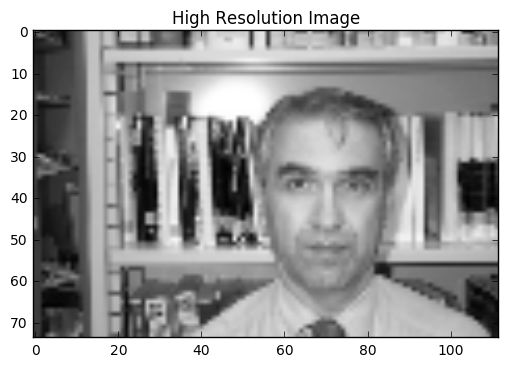

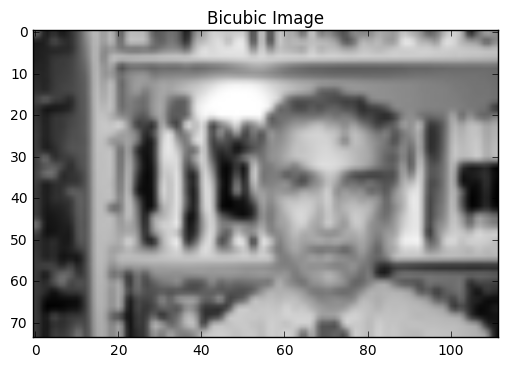

In [5]:

test_x,test_y = Data_File.Data('test')

img_id = 0

img_lr = test_x[img_id]
img_hr = test_y[img_id]

bicubic = cv2.resize(img_lr,(0,0),fx=2,fy=2)

fig = plt.figure()

plt.imshow(img_lr,cmap='gray')
plt.title('Low Resolution Image')

fig = plt.figure()

plt.imshow(img_hr,cmap='gray')
plt.title('High Resolution Image')


fig = plt.figure()

plt.imshow(bicubic,cmap='gray')
plt.title('Bicubic Image')







print ("Average PSNR for Bicubic Interpolation is ", avg_psnr(test_x*255,test_y*255) )
print ("Average Train Error Bicubic Interpolation is ", mse(test_x,test_y))


In [ ]:
bicubic.shape

In [9]:
test_x.shape

(46, 37, 56)